In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np 
import matplotlib.pyplot as plt 
import pandas 
import pydicom 
import os
from pydicom.data import get_testdata_file
import tensorflow_io as tfio

c:\Users\yunfe\anaconda3\envs\tensorflowenv\lib\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR UI: '"1.2.840.10008.5.1.4.1.1.77.1.4"'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


(4000, 6000, 3)


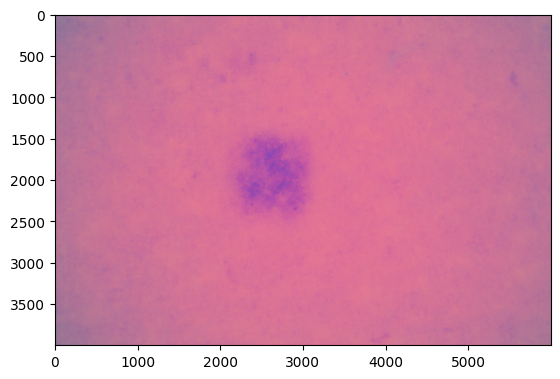

In [2]:
# READING A SIMPLE DICOM FILE
file = get_testdata_file("../test/ISC_0052060.dcm")
dicom_img = pydicom.dcmread(r"C:\Users\yunfe\Downloads\ISIC_2020_Training_Dicom\train\ISIC_3626079.dcm")
img_array = dicom_img.pixel_array

print(img_array.shape)
plt.imshow(img_array)

Read all training data and resize the images to 256 x 256

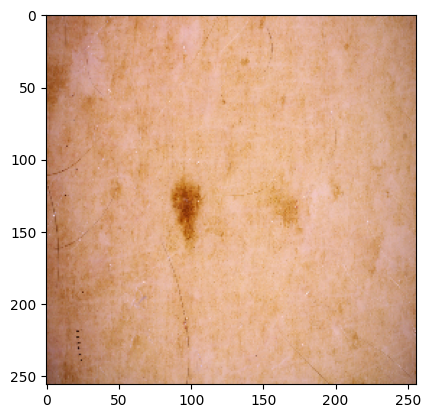

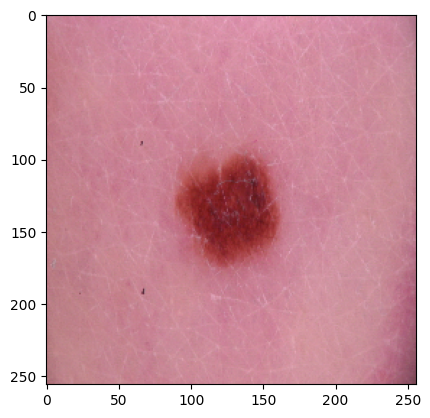

In [23]:
directory = r"C:\Users\yunfe\Downloads\ISIC_2020_Training_Dicom\train"

file_paths = []

for file in os.listdir(directory):
    if file.endswith(".dcm"):
        file_paths.append(os.path.join(directory, file))
    else:
        continue

data = tf.data.Dataset.from_tensor_slices(file_paths)

def preprocess_data(file_path):
    image = tf.io.read_file(file_path)
    image = tfio.image.decode_dicom_image(image, dtype=tf.float32)

    # Resize the image to 256x256
    resized_image = tf.image.resize(image, [256, 256])
    return resized_image

data = data.map(preprocess_data, num_parallel_calls=tf.data.experimental.AUTOTUNE)

for s in data.take(2):
    image = tf.reshape(s, [256, 256, 3]).numpy()
    plt.imshow(image.astype(np.uint8))
    plt.show()